#**Programming Assignment 3**
**LOGISTIC REGRESSION**


---



*In this programming project, we will use the Wisconsin Breast Cancer dataset to create a logistic regression model for classifying breast cancers. This dataset, provided from the UCI Machine Learning Repository, has 699 breast tumor examples with characteristics such as clump thickness, homogeneity of cell size and shape, and mitoses, among others. The major purpose is to preprocess the data, create a logistic regression model, and test its ability to discriminate between benign and malignant tumors. To train the model, divide the dataset into training and testing sets, scale it according to conventional rules, and utilize logistic regression. The project also requires creating a confusion matrix, calculating several performance indicators, and visualizing the ROC curve to assess the model's accuracy and efficacy.*

In [ ]:
# Install and load the dataset from the UCI ML repository
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch the breast cancer dataset
breast_cancer = fetch_ucirepo(id=17)

# Use only the mean values for each feature
x = breast_cancer.data.features
x = x.filter(regex='1$')
y = breast_cancer.data.targets

*This code fetches the breast cancer dataset from the UCI repository, selects only the mean values for each feature, and assigns the target labels to y.*

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

*This code imports essential libraries for data manipulation (pandas, numpy), visualization (seaborn, matplotlib), machine learning model training and evaluation (sklearn), including logistic regression, data scaling, model evaluation metrics, and plotting.*

#**Part 2: Exploratory Data Analysis**


---



In [ ]:
#Print the metadata information:
print(str(breast_cancer.metadata.additional_info.variable_info))

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [ ]:
#Display the first few rows of the features:
x.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
#Display the first few rows of the target:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


**Convert the target labels from 'M' and 'B' to binary form:**


In [ ]:
# Ensure that we are working with a copy of the DataFrame to avoid SettingWithCopyWarning
y_copy = y.copy()

# Replacing the labels from M and B to 1 and 0, respectively
y_copy['Diagnosis'] = y_copy['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0).astype(int)

# Display the first few rows to check the changes
y_copy.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


**Generate and visualize the correlation matrix:**



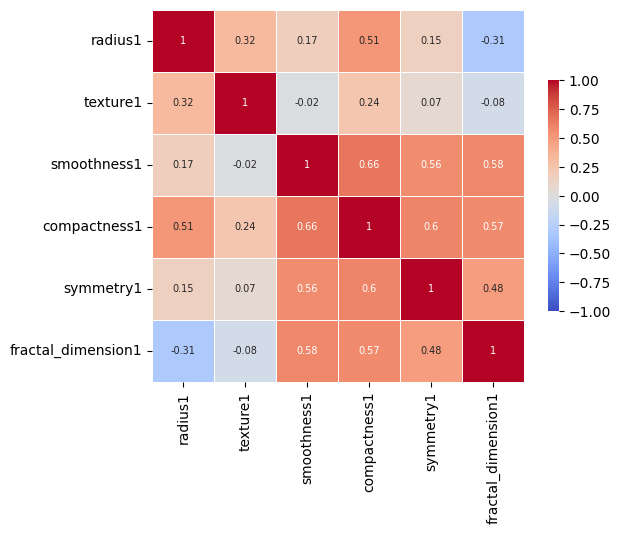

In [ ]:
def heatmap(x):
    corr = x.corr().round(2)
    plt.figure(figsize=(6, 6))
    sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":7})
    plt.show()

heatmap(x)

**Remove features to avoid multicollinearity:**

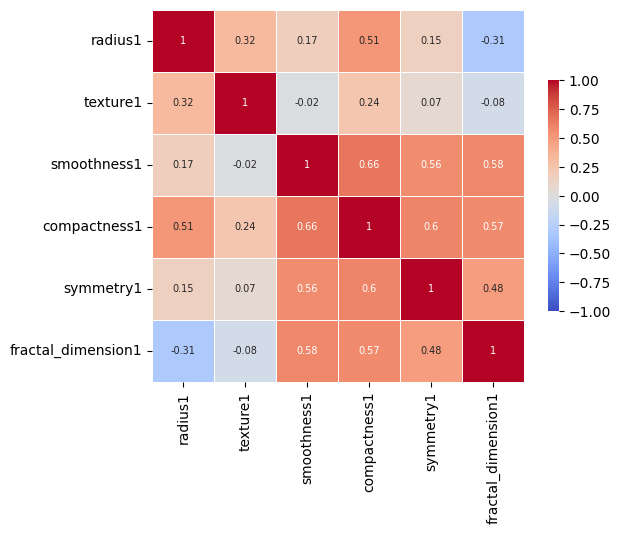

In [ ]:
x = x[['radius1', 'texture1', 'smoothness1', 'compactness1', 'symmetry1', 'fractal_dimension1']]
heatmap(x)

#Part 3: Model Training

Split the data into training and testing sets:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=7)

Create a logistic regression pipeline:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with StandardScaler and LogisticRegression
model = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

# Fit the pipeline to the training set (flatten y_train using ravel())
model.fit(x_train, y_train.values.ravel())

# Use the model to predict the values for the test set
y_pred = model.predict(x_test)

Evaluate the model:

In [ ]:
print(f"Training Accuracy = {round(model.score(x_train, y_train), 2)}")
print(f"Testing Accuracy = {round(model.score(x_test, y_test), 2)}")

for key, coef in zip(x.keys(), model.named_steps['model'].coef_[0]):
    print(f"{key}: {round(coef, 2)}")

print(f"Intercept: {model.named_steps['model'].intercept_}")

Training Accuracy = 0.94
Testing Accuracy = 0.92
radius1: 3.28
texture1: 1.2
smoothness1: 1.05
compactness1: 0.99
symmetry1: 0.5
fractal_dimension1: -0.49
Intercept: [-0.96137444]


Visualize the confusion matrix:

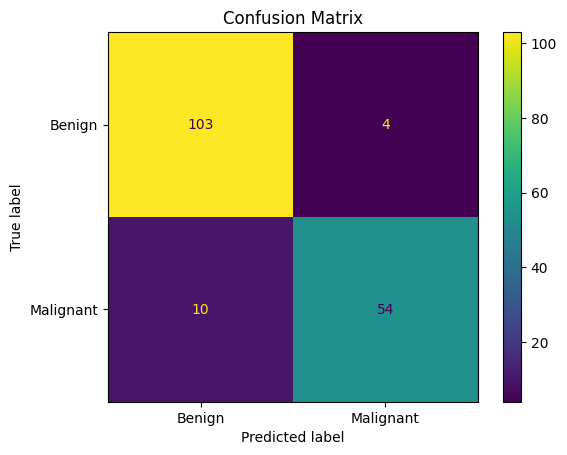

In [ ]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

Calculate the evaluation metrics:

In [ ]:
TN, FP, FN, TP = cfm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
far = FP / (FP + TN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Alarm Rate: {far}")
print(f"F1-score: {f1}")

Precision: 0.9310344827586207
Recall: 0.84375
False Alarm Rate: 0.037383177570093455
F1-score: 0.8852459016393444


Plot the ROC curve:

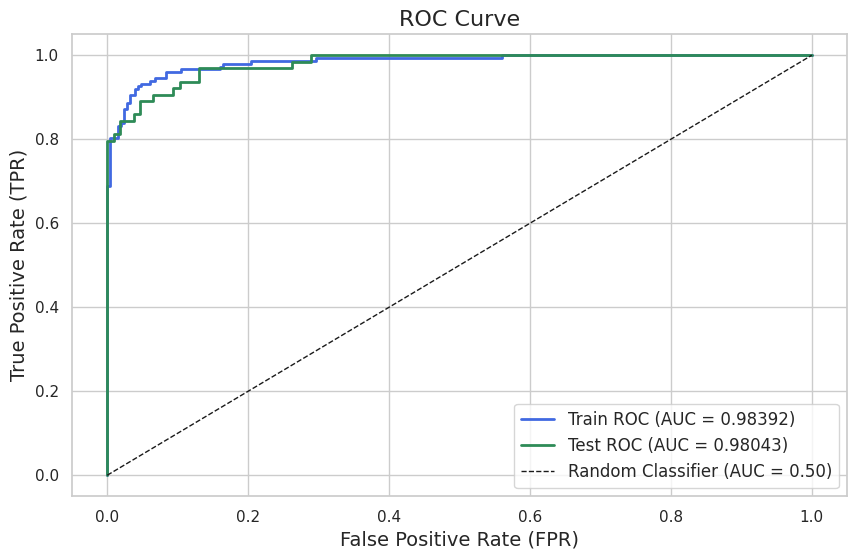

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that we are working with a copy of the DataFrame to avoid SettingWithCopyWarning
y_copy = y.copy()

# Replacing the labels from M and B to 1 and 0, respectively
y_copy['Diagnosis'] = y_copy['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0).astype(int)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_copy['Diagnosis'], stratify=y_copy['Diagnosis'], test_size=0.3, random_state=7)

# Create a pipeline with StandardScaler and LogisticRegression
model = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

# Fit the pipeline to the training set (flatten y_train using ravel())
model.fit(x_train, y_train)

# Use the model to predict the probabilities for the train and test set
y_train_probs = model.predict_proba(x_train)[:, 1]
y_test_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
auc_train = roc_auc_score(y_train, y_train_probs)

# Compute ROC curve and AUC for testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = roc_auc_score(y_test, y_test_probs)

# Set the style for the plot
sns.set(style="whitegrid")

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.5f})", color='royalblue', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.5f})", color='seagreen', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)", linewidth=1)

# Add labels and legend
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

#Guide Questions


---

**1. What steps are required to remove the "Sample code number" column?**

  *Removing the "Sample code number" column: To remove the "Sample code number" column, we can use the drop method in pandas. This step is essential to eliminate any non-essential or irrelevant features from the dataset, ensuring that the model focuses on the most relevant attributes for predicting the target variable.*




---


**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**

  *Converting "Class" values into binary form: The "Class" values can be converted into binary (0 and 1) form in Python by using the map function. This transformation is crucial for converting categorical data into a format suitable for binary classification tasks, allowing the model to interpret and learn from the target variable effectively. According to the document, the values for benign and malignant are 2 and 4, respectively. Reassign the values of the Diagnosis column with its value divided by 2, minus 1: Diagnosis = Diagnosis / 2 - 1.*





---

**3. What is the importance of splitting the dataset into training and testing sets?**

*Splitting the dataset into training and testing sets is vital for evaluating the model's performance on unseen data. It helps in assessing the model's generalization ability and ensures that the model's predictive capabilities extend beyond the data it was trained on.*





---

**4. Why is it necessary to use the stratify parameter in the train_test_split function?**

*Using the stratify parameter in the train_test_split function is essential to maintain the class distribution of the original dataset in the training and testing sets. This is crucial for ensuring that the model learns from a representative sample of the data and can make accurate predictions for each class.*




---


**5. What is logistic regression, and why is it suitable for this dataset?**

*Logistic regression and its suitability for the dataset: Logistic regression is a statistical method used for binary classification tasks. It's suitable for this dataset as the target variable ("Class") has binary values, making logistic regression an appropriate choice for predicting the likelihood of a tumor being malignant or benign based on the given features.*




---
**6. How can the training and testing accuracy of the logistic regression model be calculated?**

*Calculating training and testing accuracy of the logistic regression model: The training and testing accuracy of the logistic regression model can be calculated using the accuracy_score function from scikit-learn. This metric provides insights into the model's performance in terms of correctly predicting the target variable for both the training and testing datasets.*





---
**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**:

*The most influential features are radius, texture, smoothness, compactness, symmetry, and fractal dimension. Their coefficients indicate their importance.The importance of features can be assessed using the coefficients obtained from the logistic regression model. Features with higher absolute coefficients are more influential in determining the tumor status, indicating their significance in predicting the likelihood of malignancy.*






---

**8. How is a confusion matrix generated, and what does it represent?**

*The confusion matrix can be generated using the confusion_matrix function from sklearn.metrics. It summarizes the actual and predicted values. A confusion matrix is generated using the actual and predicted values from the model. It represents the true positive, true negative, false positive, and false negative predictions, providing a comprehensive overview of the model's performance.*




---

**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

*These metrics can be calculated from the confusion matrix using the formulas providing insights into the model's performance in terms of precision, recall, overall accuracy, and the rate of false alarms or misclassifications.
formulas:
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
False Alarm Rate: FP / (FP + TN)
F1-score: 2 * (precision * recall) / (precision + recall)*




---
**10. Why are these metrics important for evaluating the performance of a classifier?**

*These metrics are important for evaluating the performance of a classifier and can be prioritized based on the use case. These metrics provide a comprehensive understanding of the model's predictive capabilities, including its precision, recall, and overall accuracy. They are crucial for assessing the model's performance and identifying areas for improvement.*





---

**11. What is an ROC curve, and how is it plotted for a logistic regression model?**

*The ROC curve is plotted by comparing the true positive rate and false positive rate. It helps determine the model's performance across all thresholds. An ROC curve is a graphical representation of the true positive rate against the false positive rate. It can be plotted using the roc_curve function from scikit-learn, providing insights into the model's ability to distinguish between classes and its overall performance.*




---
**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

*Calculation and significance of AUC: The AUC represents the area under the ROC curve and provides a measure of the model's ability to distinguish between classes. Higher AUC values indicate better performance, signifying the model's effectiveness in making accurate predictions.*





---
**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

*The training ROC curve is usually better than the testing ROC curve. A significant deviation indicates underfitting or overfitting. Discrepancies between the training and testing ROC curves can indicate potential overfitting or underfitting issues, providing insights into the model's generalization ability and its performance on unseen data.*






---

**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

*The main challenge was preprocessing the data due to differences in the provided dataset and documentation. Understanding the feature variations helped resolve this. Challenges may include handling missing data, feature scaling, or addressing class imbalances. These can be addressed using appropriate preprocessing techniques and model adjustments, ensuring the model's robustness and predictive accuracy.*




---
**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**

*Adjustments may involve hyperparameter tuning, feature selection, addressing class imbalances, or using more advanced modeling techniques to enhance the model's performance. These adjustments are crucial for refining the model and improving its predictive capabilities.*

